In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/Brain tumour data/Training",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 5732 images belonging to 4 classes.


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 4s 0us/step


In [7]:
for layer in vgg16.layers:
  layer.trainable = False

In [8]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [9]:
prediction = layers.Dense(units=4,activation="softmax")(x)
model = tf.keras.models.Model(inputs = vgg16.input,outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
import tensorflow as tf

# Define the optimizer with weight decay
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)

# Compile your model with this optimizer
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

result = model.fit(train_data, epochs = 20, steps_per_epoch=len(train_data))

Epoch 1/20
180/180 [==============================] - 3323s 18s/step - loss: 0.8373 - accuracy: 0.6511
Epoch 2/20
180/180 [==============================] - 109s 608ms/step - loss: 0.6059 - accuracy: 0.7517
Epoch 3/20
180/180 [==============================] - 109s 604ms/step - loss: 0.5319 - accuracy: 0.7854
Epoch 4/20
180/180 [==============================] - 109s 603ms/step - loss: 0.4552 - accuracy: 0.8222
Epoch 5/20
180/180 [==============================] - 107s 593ms/step - loss: 0.4773 - accuracy: 0.8144
Epoch 6/20
180/180 [==============================] - 107s 594ms/step - loss: 0.4381 - accuracy: 0.8283
Epoch 7/20
180/180 [==============================] - 108s 598ms/step - loss: 0.4131 - accuracy: 0.8398
Epoch 8/20
180/180 [==============================] - 108s 601ms/step - loss: 0.3826 - accuracy: 0.8522
Epoch 9/20
180/180 [==============================] - 107s 596ms/step - loss: 0.3837 - accuracy: 0.8519
Epoch 10/20
180/180 [==============================] - 109s 600ms

In [12]:
from tensorflow.keras.preprocessing import image
output_class = ["glioma_tumor","meningioma_tumor","no_tumor","pitutary_tumor"]
def braintumor_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Brain Tumor name is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

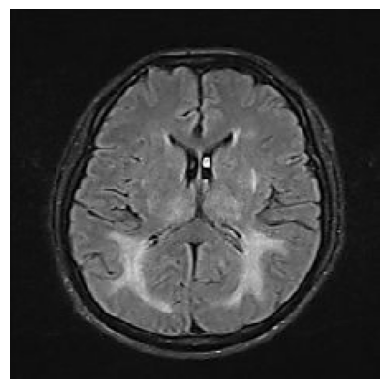

1/1 [==============================] - 0s 53ms/step
Brain Tumor name is  no_tumor  with  100.0  % accuracy


In [18]:
braintumor_prediction("/content/drive/MyDrive/Brain tumour data/Testing/notumor/Te-noTr_0001.jpg")

In [ ]:
model.save("/content/drive/MyDrive/braintumor_prediction.keras")